# `Cadeia de Markov`


### Uma cadeia de Markov é um modelo que explica uma sequência de eventos onde o próximo evento só depende da ocorrência atual, ou o estado atual. Da mesma forma, a ocorrência atual só dependeu da última ocorrência, e não de toda a sequência anterior de eventos ocorridos. A cada ida de um estado a outro há uma probabilidade embutida.

<br>
<br>

![alt_text](https://miro.medium.com/max/1400/1*Uh11rrUKKsHLLRmmv0ss2w.jpeg)

### Exemplo

Vamos dizer que você trabalha num escritória no centro de Nova York. Todos os dias você sai para almoçar e precisa decidir entre dois restaurantes (A e B) qual vai ser o escolhido do dia, seguindo a seguinte regra:


* Se comeu no restaurante A hoje, então amanhã você tem 85% de chance de comer no restaurante B


* Se comeu no restaurante B hoje, então amanhã você tem 73% de chance de comer no restaurante A

#### Supondo que você conhece o cardápio de hoje dos dois restaurantes e que havia 58% de chance de você ter ido no restaurante A e 42% de chance de ter ido no restaurante B, qual a probabilidade de você ir no restaurante A amanhã?

#### Assim ficaria o grafo dos estados desse modelo de Markov

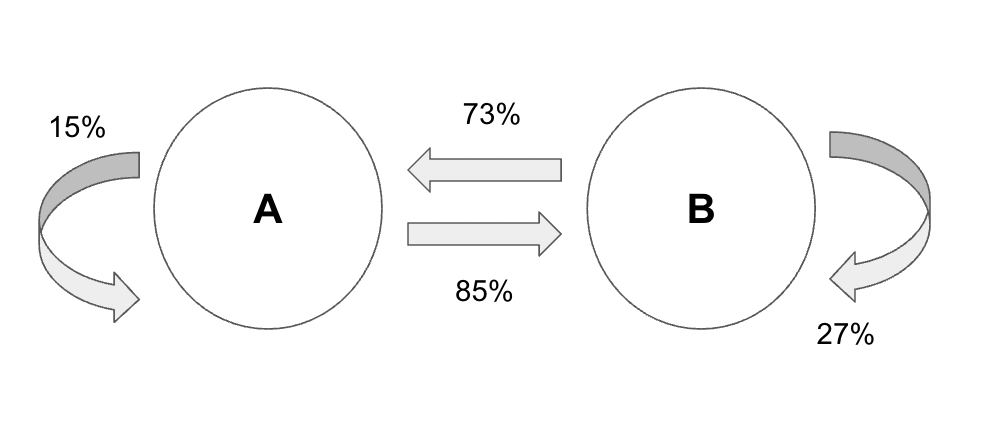

In [1]:
p_A_amanha_dado_B_hoje = 0.73
p_B_amanha_dado_B_hoje = 0.27

p_B_amanha_dado_A_hoje = 0.85
p_A_amanha_dado_A_hoje = 0.15

p_A = 0.58
p_B = 0.42

Vamos utilizar o Teorema de Bayes para calcular as probabilidades de comer amanhã nos restaurantes A e B

In [2]:
p_A_amanha = p_A*p_A_amanha_dado_A_hoje + p_B*p_A_amanha_dado_B_hoje
p_A_amanha

0.39359999999999995

In [3]:
p_B_amanha = p_A*p_B_amanha_dado_A_hoje + p_B*p_B_amanha_dado_B_hoje
p_B_amanha

0.6063999999999999

Provavelmente você vai no restaurante B amanhã. Mas, e daqui a 10 dias?

In [4]:
import numpy as np

In [5]:
# vamos representar tudo numa matriz


# [A_para_A, A_para_B]
# [B_para_A, B_para_B]



hoje = np.array([
    [0.15, 0.85],
    [0.73, 0.27]
])

Para calcular como seria a mesma matriz daqui a x dias, elevamos a matriz a x+1 potência

In [8]:
nove_dias_a_frente = np.linalg.matrix_power(hoje, 10)

Agora, vamos definir a priori novamente, tambem como uma matriz

In [9]:
# priori = [ A  B ]

priori = np.array([ [0.42], [0.58]])

Agora, vamos calcular a probabilidade de, depois de daqui a 10 dias você ir nos restaurantes A e B multiplicando as duas matrizes!

In [11]:
daqui_a_dez_dias = np.matmul(nove_dias_a_frente, priori)

daqui_a_dez_dias

array([[0.50570513],
       [0.50639442]])

Parece que você ficaria bem indeciso!